<a href="https://colab.research.google.com/github/fridaruh/exp_usuario_pln/blob/master/Analisis_de_sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_token_secret = ''

In [ ]:
import tweepy
import pandas as pd
import seaborn as sns

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.0MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
tweet_user = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search, q='whatsapp', count=1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'en':
      tweet_user.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

df = pd.DataFrame({'name': tweet_user, 'time':tweet_time, 'tweet':tweet_string})

In [ ]:
#tweet_user

In [ ]:
df.to_csv('whatsapp.csv')

In [ ]:
df.shape

(81, 3)

In [ ]:
df = pd.read_csv('/content/whatsapp.csv')

In [ ]:
analyser.polarity_scores("I feel so tired")

{'compound': -0.5777, 'neg': 0.555, 'neu': 0.445, 'pos': 0.0}

In [ ]:
def sentiment_analyzer_scores(tweet):
  score = analyser.polarity_scores(tweet)
  comp = score['compound']
  if comp >= 0.05:
    return 1
  elif (comp > -0.05) and (comp<0.05):
    return 0
  else:
    return -1

In [ ]:
df.head(3)

,name,time,tweet
0,Naresh Nokhwal,2021-05-26 00:22:11,@MOHITSI23046736 O whatsApp bhi band hosi😜
1,⭒,2021-05-26 00:22:11,yres\n\nprior babu monumental marinette tays r...
2,𝐌𝐞...🦉 PRONOME? ELE/ELA,2021-05-26 00:22:05,@felipeneto prior babu monumental marinette ta...


In [ ]:
df['sentiment'] = df['tweet'].apply(lambda x: sentiment_analyzer_scores(x))

In [ ]:
df.sample(5)

,name,time,tweet,sentiment
15,soda ⚣︎ • 🔰,2021-05-26 00:21:22,@K4ID0VR 9 \nprior babu monumental marinette t...,-1
44,mabel,2021-05-26 00:20:16,@iPetAsuka nao \n\nprior babu monumental marin...,-1
21,PRITESH BUNKER,2021-05-26 00:21:10,@WhatsApp my whatsapp number has been bannend...,1
16,Vishal Tiwari (अभय),2021-05-26 00:21:21,"Facebook, Instagram &amp; WhatsApp have compli...",0
75,Achievinghelpers,2021-05-26 00:19:14,We offer reliable services ever\nAnatomy\nChem...,1


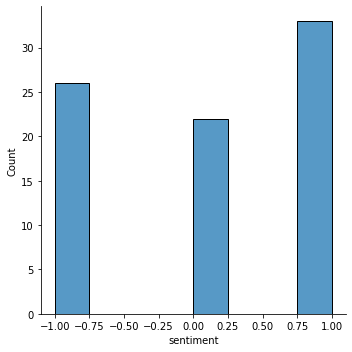

In [ ]:
sns.displot(df, x='sentiment')